In [ ]:
!pip install googletrans==4.0.0-rc1

# BT Google with check NONE, content is too long so ERROR.

In [ ]:
import pandas as pd
from googletrans import Translator

def back_translate(text, src_lang='ko', tgt_lang='zh-CN'):
    if text is None or text.strip() == '':
        return None, None

    translator = Translator()
    translated_text = translator.translate(text, src=src_lang, dest=tgt_lang).text
    back_translated_text = translator.translate(translated_text, src=tgt_lang, dest=src_lang).text
    return translated_text, back_translated_text

def augment_dataset(input_file, output_file):
    df = pd.read_csv(input_file)

    augmented_data = []
    for index, row in df.iterrows():
        if row['label'] == 1:
            # print(row['transcript'])
            translated_text, back_translated_text = back_translate(row['transcript'])
            augmented_data.append([row['id'], row['transcript'], translated_text, back_translated_text, row['label']])
        else:
            augmented_data.append([row['id'], row['transcript'], None, None, row['label']])

    augmented_df = pd.DataFrame(augmented_data, columns=['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
    augmented_df.to_csv(output_file, index=False)

In [ ]:
input_file = 'KorCCVi_v2.csv'
output_file = 'vishing_dataset_AUG.csv'
augment_dataset(input_file, output_file)

# BT with Google 1

In [ ]:
import pandas as pd
from googletrans import Translator

def back_translate(text, src_lang='ko', tgt_lang='zh-CN'):
    translator = Translator()
    translated_text = translator.translate(text, src=src_lang, dest=tgt_lang).text
    back_translated_text = translator.translate(translated_text, src=tgt_lang, dest=src_lang).text
    return translated_text, back_translated_text

def augment_dataset(input_file, output_file):
    df = pd.read_csv(input_file)

    augmented_data = []
    for index, row in df.iterrows():
        if row['label'] == 1:
            print(row['transcript'])
            # translated_text, back_translated_text = back_translate(row['transcript'])
            # augmented_data.append([row['id'], row['transcript'], translated_text, back_translated_text, row['label']])
        else:
            pass
            # augmented_data.append([row['id'], row['transcript'], None, None, row['label']])

    # augmented_df = pd.DataFrame(augmented_data, columns=['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
    # augmented_df.to_csv(output_file, index=False)

In [ ]:
input_file = 'KorCCVi_v2.csv'
output_file = 'vishing_dataset_AUG.csv'
augment_dataset(input_file, output_file)

In [ ]:
# %matplotlib inline 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from googletrans import Translator

def back_translate(text, src_lang='ko', tgt_lang='zh-CN'):
    translator = Translator()
    translated_text = translator.translate(text, src=src_lang, dest=tgt_lang).text
    back_translated_text = translator.translate(translated_text, src=tgt_lang, dest=src_lang).text
    return translated_text, back_translated_text

def load_datast(input_file):
    dataset = pd.read_csv(input_file)
    # print(dataset)
    # print('*'*100)
    
#     # plot class distribution
#     class_counts = dataset['label'].value_counts().reset_index()
#     class_counts.columns = ['Class Label', 'Count']

#     sns.barplot(x='Class Label', y='Count', data=class_counts)

#     plt.title('Class Distribution')
#     plt.xlabel('Class Label')
#     plt.ylabel('Count')
#     plt.xticks(rotation=0)
#     plt.show()    
#     print('*'*100)
    
    dataset.info()
    dataset['label'].value_counts()
    print('*'*100)
    
    # drop the colum we don't need
    dataset.drop(['confidence'], axis=1, inplace=True)
    dataset
    print('*'*100)   
    
    return dataset
    
def augment_dataset(df, output_file):
    augmented_data = []
    for index, row in df.iterrows():
        if row['label'] == 1:
            translated_text, back_translated_text = back_translate(row['transcript'])
            augmented_data.append([row['id'], row['transcript'], translated_text, back_translated_text, row['label']])
        else:
            augmented_data.append([row['id'], row['transcript'], None, None, row['label']])

    augmented_df = pd.DataFrame(augmented_data, columns=['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
    augmented_df.to_csv(output_file, index=False)

In [ ]:
input_file = 'KorCCVi_v2.csv'
load_datast(input_file)

In [ ]:
output_file = 'vishing_dataset_AUG.csv'
augment_dataset(input_file, output_file)

# Using crawling with google translate

In [ ]:
!pip install transformers

In [ ]:
!pip install selenium

In [ ]:
# !apt install chromium-chromedriver

In [ ]:
# import time
# from selenium import webdriver

# driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver')  # Optional argument, if not specified will search path.
# driver.get('http://www.google.com/');

# time.sleep(5) # Let the user actually see something!
# search_box = driver.find_element_by_name('q')
# search_box.send_keys('ChromeDriver')
# search_box.submit()
# time.sleep(5) # Let the user actually see something!
# driver.quit()

In [ ]:
import time
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager

# service = ChromeService(executable_path=ChromeDriverManager().install())
# driver = webdriver.Chrome(service=service)

## selenium 4
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromiumService
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome(service=ChromiumService(ChromeDriverManager(chrome_type=ChromeType.CHROMIUM).install()))

# # selenium 4
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service as ChromeService
# from webdriver_manager.chrome import ChromeDriverManager

# driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# driver.get("https://www.selenium.dev/selenium/web/web-form.html")
driver.get("https://www.google.com")
# driver.implicitly_wait(5)

text_box = driver.find_element(by=By.NAME, value="q")
text_box.send_keys('ChromeDriver')
# submit_button = driver.find_element(by=By.CSS_SELECTOR, value="button")
text_box.send_keys(Keys.RETURN)
# submit_button.submit()

# driver.implicitly_wait(5) # Let the user actually see something!
driver.quit()

# Google

In [ ]:
import pandas as pd
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
 

    def back_translate(text, src_lang='ko', tgt_lang='zh-CN'):
    if text is None or text.strip() == '':
        return None, None

    url = f'https://translate.google.com/?sl={src_lang}&tl={tgt_lang}&op=translate'

    driver = webdriver.Chrome()  # Add the path to your Chrome webdriver if needed: webdriver.Chrome(executable_path='path/to/chromedriver')
    driver.get(url)
    input_box = driver.find_element_by_css_selector('.er8xn')
    input_box.send_keys(text)
    time.sleep(2)

    translated_text = driver.find_element_by_css_selector('.NqnNQd').text
    driver.find_element_by_css_selector('.poPITe').click()
    time.sleep(1)

    input_box = driver.find_element_by_css_selector('.er8xn')
    input_box.clear()
    input_box.send_keys(Keys.CONTROL, 'a')
    input_box.send_keys(Keys.DELETE)
    input_box.send_keys(translated_text)
    time.sleep(2)

    back_translated_text = driver.find_element_by_css_selector('.NqnNQd').text
    driver.quit()
    
    return translated_text, back_translated_text

def augment_dataset(input_file, output_file):
    df = pd.read_csv(input_file)

    augmented_data = []
    for index, row in df.iterrows():
        if row['label'] == 1:
            translated_text, back_translated_text = back_translate(row['transcript'])
            augmented_data.append([row['id'], row['transcript'], translated_text, back_translated_text, row['label']])
        else:
            augmented_data.append([row['id'], row['transcript'], None, None, row['label']])

    augmented_df = pd.DataFrame(augmented_data, columns=['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
    augmented_df.to_csv(output_file, index=False)

In [ ]:
back_translate('사랑합니다, 오늘은.', src_lang='ko', tgt_lang='zh-CN')

In [ ]:
input_file = 'KorCCVi_v2.csv'
output_file = 'vishing_dataset_AUG.csv'
augment_dataset(input_file, output_file)

# Using crawling with Naver Papago

## Final Code

In [4]:
import pandas as pd
import time
import os
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from sklearn.model_selection import train_test_split
import csv

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.expected_conditions import presence_of_element_located
from selenium.common.exceptions import TimeoutException, NoSuchElementException


def load_dataset(input_file, outpu_file_AUG):
    train_ratio = 0.7
    validation_ratio = 0.15
    test_ratio = 0.15

    dataset = pd.read_csv(input_file)    
    # dataset.info()
    # dataset['label'].value_counts()
    # print(dataset.head())
    # print('*'*100)

    # drop the colum we don't need
    dataset.drop(['confidence'], axis=1, inplace=True)
    plot_class_distribution(dataset, 'Full Dataset Class Distribution')
    # dataset = dataset.sample(frac=1)
    # dataset = dataset.sort_values(by=['label'], ascending=False)
    # print('*'*100)
    
    # Separate the dataset by labels
    data_0 = dataset[dataset['label'] == 0]
    data_1 = dataset[dataset['label'] == 1]

    # Split each part into training, validation, and test sets
    train_data_0, test_data_0 = train_test_split(data_0, test_size=test_ratio, random_state=42)
    train_data_0, val_data_0 = train_test_split(train_data_0, test_size=validation_ratio/(train_ratio + validation_ratio), random_state=42)

    train_data_1, test_data_1 = train_test_split(data_1, test_size=test_ratio, random_state=42)
    train_data_1, val_data_1 = train_test_split(train_data_1, test_size=validation_ratio/(train_ratio + validation_ratio), random_state=42)

    # Combine the training, validation, and test sets
    train_data = pd.concat([train_data_0, train_data_1]).sample(frac=1, random_state=42)
    val_data = pd.concat([val_data_0, val_data_1]).sample(frac=1, random_state=42)
    test_data = pd.concat([test_data_0, test_data_1]).sample(frac=1, random_state=42)
    
    # plot the different distribution
    plot_class_distribution(train_data, 'Training Set Class Distribution')
    plot_class_distribution(val_data, 'Validation Set Class Distribution')
    plot_class_distribution(test_data, 'Test Set Class Distribution')    
    
    # save the split data to csv files
    train_data.to_csv("training_set.csv", index=False)
    val_data.to_csv("validaton_set.csv", index=False)    
    test_data.to_csv("test_set.csv", index=False)    
    
    
    # Create a new DataFrame called train_data_AUG from train_data
    train_data_AUG = train_data.copy()
    
    # Add new columns 'processed', 'translated_text', and 'back_translation', and set default values
    train_data_AUG['translation'] = ''
    train_data_AUG['back_translation'] = ''
    train_data_AUG['processed'] = 0

    # Reorder columns in the DataFrame
    column_order = ['id', 'transcript', 'translation', 'back_translation', 'label', 'processed']
    train_data_AUG = train_data_AUG[column_order]

    # save the updated DataFrame to a new CSV file
    train_data_AUG.to_csv(outpu_file_AUG, index=False)
    # print(train_data_AUG.head())
    # print('*'*100)
    # print(train_data_AUG)
    # print('#'*100)
    
    # plot class distribution
    # class_counts = dataset['label'].value_counts().reset_index()
    # class_counts.columns = ['Class Label', 'Count']

    # sns.barplot(x='Class Label', y='Count', data=class_counts)
    # plt.title('Class Distribution')
    # plt.xlabel('Class Label')
    # plt.ylabel('Count')
    # plt.xticks(rotation=0)
    # plt.show()    
    # print('*'*100)
    
    # train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
    # train_set.to_csv("train_set.csv", index=False)
    # test_set.to_csv("test_set.csv", index=False)    
    
    # print(train_data)
    return train_data_AUG


def plot_class_distribution(data, title):
    sns.set(style="darkgrid")
    ax = sns.countplot(x='label', data=data)
    ax.set_title(title)
    
    # Annotate the bars with the number of samples
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    plt.show()


def augment_dataset(df, output_file, src_lang, tgt_lang):
    # options = Options()
    # # options.add_argument('--headless') 
    # # options.add_argument('--no-sandbox')
    # options.add_argument('--disable-dev-shm-usage')
    # driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    # driver.maximize_window()
    
    # df = df.sort_values(by=['label'], ascending=False)
    
    
    # # Write the header to the output CSV file
    # with open(output_file, mode='w', newline='') as csvfile:
    #     writer = csv.writer(csvfile)
    #     writer.writerow(['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
    
    
    # Extract rows where 'label' is equal to 1 and 'processed' is equal to 0
    # filtered_df = df[df['label'] == 1]
    # filtered_df = df.query('label == 1 and processed == 0')
    filtered_df = df[(df['label'] == 1) & (df['processed'] == 0)]
    
    if len(filtered_df) >= 1:
        for index, row in tqdm(filtered_df.iterrows(), total=filtered_df.shape[0]):
        # for index, row in df.iterrows():
            # if row['label'] == 1:
            # print(row)
            print('ID: ', row['id'])
            # print('-'*100)
            translation, back_translation = back_translate(row['transcript'], src_lang, tgt_lang)
            # augmented_data.append([row['id'], row['transcript'], translated_text, back_translated_text, row['label']])    

            # Update the 'processed' column to 1 for the successful bac-translated operetation 
            # train_data_AUG.loc[train_data_AUG['id'] == 12, 'processed'] = 1        
            df.loc[df['id'] == index, 'translation'] = translation  
            df.loc[df['id'] == index, 'back_translation'] = back_translation
            df.loc[df['id'] == index, 'processed'] = 1
            # print(df.loc[df['id'] == index])
            # print('-'*100)
            # print(df)
            # print('#'*100)
            # else:
            # augmented_data.append([row['id'], row['transcript'], None, None, row['label']])



            # Write the updated DataFrame back to the CSV file
            df.to_csv(output_file, index=False)                                   
            
            # Adding a sleep time to avoid request blocking by Naver Papago
            time.sleep(1)

        # augmented_df = pd.DataFrame(augmented_data, columns=['id', 'original_text', 'translated_text', 'back_translated_text', 'label'])
        # augmented_df.to_csv(output_file, index=False)
    
    # driver.quit()

        
def back_translate(text_data, src_lang, tgt_lang): 
    # Check the text value to be translated
    if text_data is None or text_data.strip() == '':
        return None, None
    
    sleep_time = 3.5
    wait_time = 20
    print("Text lenght:", len(text_data))
    # print('-'*100)
    if len(text_data) >= 600:
        sleep_time=5   
    
    options = Options()
    options.add_argument('--headless') 
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    driver.maximize_window()
    
    try:
        # Try to tranlate using the URL approach
        driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang+'&st='+text_data)
        time.sleep(sleep_time)
        # translation = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
        # translation = driver.find_element(by=By.ID, value='txtTarget').text
        # translation = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget'))).text
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        translation = target_element.text

        # Translate back from Chinese to Korean using the honorific form
        driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1&st='+translation)
        time.sleep(sleep_time)
        # back_translation = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
        # back_translation = driver.find_element(by=By.ID, value='txtTarget').text
        # back_translation = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget'))).text        
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        back_translation = target_element.text
        
    except NoSuchElementException:
        print('NoSuchElementException')
        # pass
        return None, None
        
    # except TimeoutException:
    #     print('TimeoutException')
    #     # pass
    #     return None, None
        
    except:
        print("Error occurred, use of method 2")
        ## Translate from Korean to Chinese
        driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang)
        WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtSource')))
        # driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(text_data)
        # driver.find_element(by=By.XPATH, value='//textarea[@id="txtSource"]').send_keys(text_data)
        # driver.find_element_by_xpath('//*[@id="txtSource"]').send_keys(text_data)

        driver.find_element(by=By.ID, value='txtSource').send_keys(text_data)

        # driver.find_element(by=By.CSS_SELECTOR, value='#txtSource').send_keys(text_data)

        time.sleep(sleep_time)
        # translation = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
        # translation = driver.find_element(by=By.ID, value='txtTarget').text
        # translation = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget'))).text
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        translation = target_element.text        

        ## Translate back from Chinese to Korean using the honorific form
        driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1')
        WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtSource')))
        # driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').clear()
        # driver.find_element_by_xpath('//*[@id="txtSource"]').clear()       
        # driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(translation)
        # driver.find_element(by=By.XPATH, value='//textarea[@id="txtSource"]').send_keys(translation)
        # driver.find_element_by_xpath('//*[@id="txtSource"]').send_keys(translation)

        # driver.find_element(by=By.ID, value='txtSource').clear()
        driver.find_element(by=By.ID, value='txtSource').send_keys(translation)

        # driver.find_element(by=By.CSS_SELECTOR, value='#txtSource').send_keys(translation)

        time.sleep(sleep_time)
        # back_translation = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
        # back_translation = driver.find_element(by=By.ID, value='txtTarget').text
        # back_translation = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget'))).text
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        back_translation = target_element.text        
        time.sleep(sleep_time)
        
    finally:
        driver.quit()
        print('-'*100)
    
    return translation, back_translation        


def main():
    input_file = 'KorCCVi_v2.csv'
    output_file_AUG = 'train_data_AUG.csv'    
    train_data_AUG = load_dataset(input_file, output_file_AUG)
    # print(train_data_AUG[:50])
    # print('$'*100)
    
    # output_file_CH = 'vishing_dataset_CH_AUG.csv'
    # augment_dataset(train_data_AUG, output_file_CH, src_lang='ko', tgt_lang='zh-CN')
    
    # output_file_JA = 'vishing_dataset_JA_AUG.csv'
    # augment_dataset(train_data_AUG, output_file_JA, src_lang='ko', tgt_lang='ja')
    
    # output_file_EN = 'vishing_dataset_EN_AUG.csv'
    # augment_dataset(train_data_AUG, output_file_EN, src_lang='ko', tgt_lang='en')

In [ ]:
train_test_split

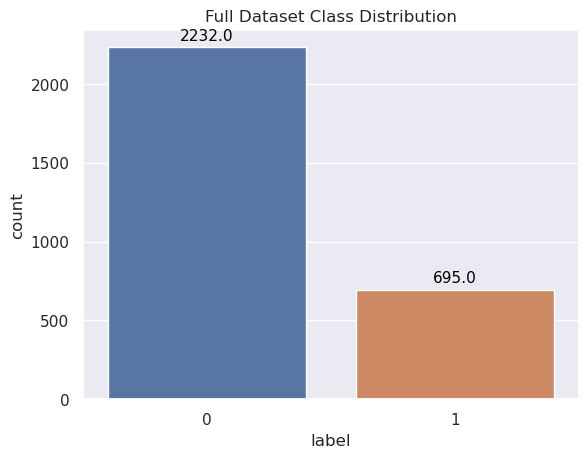

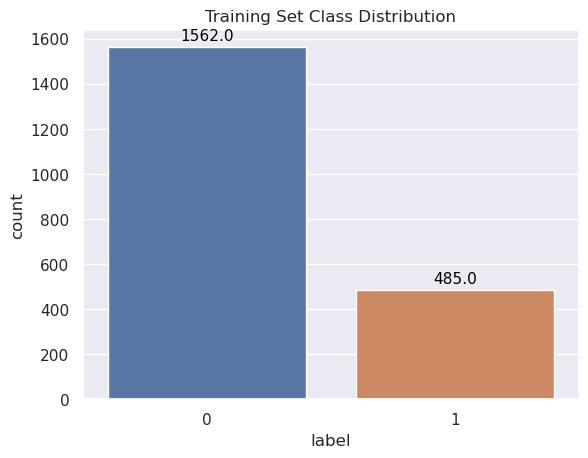

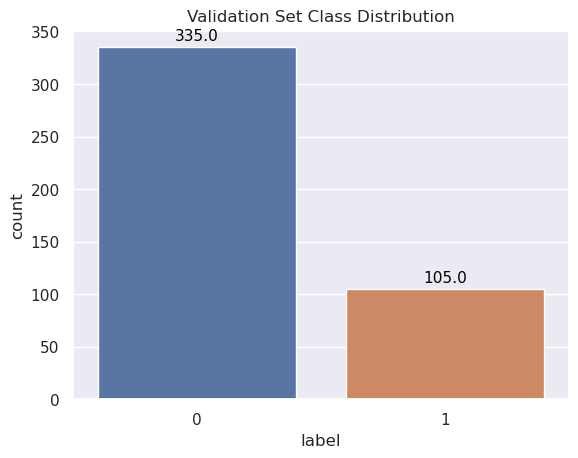

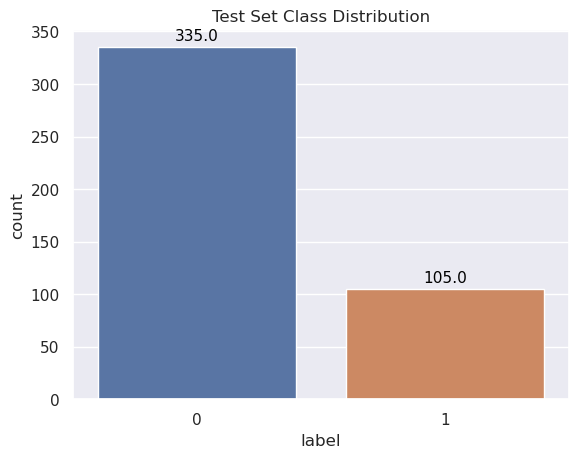

In [5]:
if __name__ == "__main__":
    main()

## Final Code multithreading 0

## Final Code multithreading

In [2]:
import time
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from webdriver_manager.chrome import ChromeDriverManager


def check_and_load_csv(file_name, input_file, output_file_AUG):
    if os.path.exists(file_name):
        print(f"Loading existing file: {file_name}")
        df = pd.read_csv(file_name)
    else:
        print(f"File not found. Running load_dataset function for: {input_file}")
        df = load_dataset(input_file, output_file_AUG)
    return df


def load_dataset(input_file, outpu_file_AUG):
    train_ratio = 0.7
    validation_ratio = 0.15
    test_ratio = 0.15

    dataset = pd.read_csv(input_file)
    # drop the colum we don't need
    dataset.drop(['confidence'], axis=1, inplace=True)
    # Separate the dataset by labels
    data_0 = dataset[dataset['label'] == 0]
    data_1 = dataset[dataset['label'] == 1]
    # Split each part into training, validation, and test sets
    train_data_0, test_data_0 = train_test_split(data_0, test_size=test_ratio, random_state=42)
    train_data_0, val_data_0 = train_test_split(train_data_0,
                                                test_size=validation_ratio / (train_ratio + validation_ratio),
                                                random_state=42)

    train_data_1, test_data_1 = train_test_split(data_1, test_size=test_ratio, random_state=42)
    train_data_1, val_data_1 = train_test_split(train_data_1,
                                                test_size=validation_ratio / (train_ratio + validation_ratio),
                                                random_state=42)

    # Combine the training, validation, and test sets
    train_data = pd.concat([train_data_0, train_data_1]).sample(frac=1, random_state=42)
    val_data = pd.concat([val_data_0, val_data_1]).sample(frac=1, random_state=42)
    test_data = pd.concat([test_data_0, test_data_1]).sample(frac=1, random_state=42)
    # save the split data to csv files
    train_data.to_csv("training_set.csv", index=False)
    val_data.to_csv("validaton_set.csv", index=False)
    test_data.to_csv("test_set.csv", index=False)

    # Create a new DataFrame called train_data_AUG from train_data
    train_data_AUG = train_data.copy()
    # Add new columns 'processed', 'translated_text', and 'back_translation', and set default values
    train_data_AUG['translation'] = ''
    train_data_AUG['back_translation'] = ''
    train_data_AUG['processed'] = 0

    # Reorder columns in the DataFrame
    column_order = ['id', 'transcript', 'translation', 'back_translation', 'label', 'processed']
    train_data_AUG = train_data_AUG[column_order]

    # save the updated DataFrame to a new CSV file
    train_data_AUG.to_csv(outpu_file_AUG, index=False)

    return train_data_AUG


def plot_class_distribution(data, title):
    sns.set(style="darkgrid")
    ax = sns.countplot(x='label', data=data)
    ax.set_title(title)

    # Annotate the bars with the number of samples
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()


def augment_dataset(df, output_file, src_lang, tgt_lang, max_workers):
    filtered_df = df[(df['label'] == 1) & (df['processed'] == 0)]
        
    if len(filtered_df) >= 1:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            tasks = []
            future_to_index = {}  # Create a dictionary to store the mapping between Future objects and index values
            
            for index, row in tqdm(filtered_df.iterrows(), total=filtered_df.shape[0]):
                # print('ID: ', row['id'])
                # print('index: ', index)
                # tasks.append(executor.submit(back_translate, row['transcript'], src_lang, tgt_lang))
                future = executor.submit(back_translate, row['transcript'], index, src_lang, tgt_lang)
                tasks.append(future)                
                future_to_index[future] = index  # Store the index value corresponding to the Future object
            
            # Wrap tasks list in tqdm for a progress bar
            for task in tasks:
            # for task in tqdm(as_completed(tasks), total=len(tasks)):
                translation, back_translation = task.result()
                # index = task.kwargs['text_data']
                index = future_to_index[task]  # Retrieve the index value from the dictionary
                # print('ID : ', index)
                df.loc[df['id'] == index, 'translation'] = translation
                df.loc[df['id'] == index, 'back_translation'] = back_translation
                df.loc[df['id'] == index, 'processed'] = 1

                # Write the updated DataFrame back to the CSV file
                df.to_csv(output_file, index=False)

                # Adding a sleep time to avoid request blocking by the translation service
                time.sleep(1)            
            

def back_translate(text_data, index, src_lang, tgt_lang):
    # Check the text value to be translated
    if text_data is None or text_data.strip() == '':
        return None, None

    sleep_time = 3.5
    wait_time = 20
    print("ID:", index, ", Text lenght:", len(text_data))
    if len(text_data) >= 600:
        sleep_time = 5

    options = Options()
    options.add_argument('--headless') 
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    driver.maximize_window()

    try:
        # Try to translate using the URL approach
        driver.get('https://papago.naver.com/?sk=' + src_lang + '&tk=' + tgt_lang + '&st=' + text_data)
        time.sleep(sleep_time)
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        translation = target_element.text

        # Translate back from Chinese to Korean using the honorific form
        driver.get('https://papago.naver.com/?sk=' + tgt_lang + '&tk=' + src_lang + '&hn=1&st=' + translation)
        time.sleep(sleep_time)
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        back_translation = target_element.text

    except NoSuchElementException:
        print('NoSuchElementException')
        return None, None

    except:
        print("Error occurred, use of method 2")
        ## Translate from Korean to Chinese
        driver.get('https://papago.naver.com/?sk=' + src_lang + '&tk=' + tgt_lang)
        WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtSource')))
        driver.find_element(by=By.ID, value='txtSource').send_keys(text_data)
        time.sleep(sleep_time)
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        translation = target_element.text

        ## Translate back from Chinese to Korean using the honorific form
        driver.get('https://papago.naver.com/?sk=' + tgt_lang + '&tk=' + src_lang + '&hn=1')
        WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtSource')))
        driver.find_element(by=By.ID, value='txtSource').send_keys(translation)
        time.sleep(sleep_time)
        target_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'txtTarget')))
        back_translation = target_element.text
        time.sleep(sleep_time)

    finally:
        driver.quit()
        print('-' * 100)

    return translation, back_translation


def main():
    input_file = 'KorCCVi_v2.csv'
    output_file_AUG = 'train_data_AUG.csv'
    train_data_AUG = load_dataset(input_file, output_file_AUG)

    # df = check_and_load_csv(file_name, input_file, output_file_AUG)
    
    output_file_CH = 'vishing_dataset_CH_AUG.csv'
    output_file_JA = 'vishing_dataset_JA_AUG.csv'
    output_file_EN = 'vishing_dataset_EN_AUG.csv'

    # options = Options()
    # options.add_argument('--headless')
    # options.add_argument('--no-sandbox')
    # options.add_argument('--disable-dev-shm-usage')
    # driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # augment_dataset(train_data_AUG, output_file_CH, src_lang='ko', tgt_lang='zh-CN', max_workers=4)
    # augment_dataset(train_data_AUG, output_file_JA, src_lang='ko', tgt_lang='ja', max_workers=10)
    augment_dataset(train_data_AUG, output_file_EN, src_lang='ko', tgt_lang='en', max_workers=10)
    print('Completed!')
    # driver.quit()

if __name__ == "__main__":
    main()

  0%|          | 0/485 [00:00<?, ?it/s]

ID: 2633 , Text lenght: 897
ID: 2707 , Text lenght: 416
ID: 2492 , Text lenght: 1391
ID: 2580 , Text lenght: 4059
ID: 2840 , Text lenght: 1129
ID: 2504 , Text lenght: 965
ID: 2713 , Text lenght: 872
ID: 2808 , Text lenght: 1569
ID: 2400 , Text lenght: 303
ID: 2500 , Text lenght: 349
----------------------------------------------------------------------------------------------------
ID: 2528 , Text lenght: 350
----------------------------------------------------------------------------------------------------
ID: 2824 , Text lenght: 641
----------------------------------------------------------------------------------------------------
ID: 2790 , Text lenght: 793
----------------------------------------------------------------------------------------------------
ID: 2697 , Text lenght: 156
----------------------------------------------------------------------------------------------------
ID: 2755 , Text lenght: 99
------------------------------------------------------------------------

## Test Codes

### Basic

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
 
options = Options()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.maximize_window()

src_lang='ko'
tgt_lang ='zh-CN'
text_data = "이렇게 적용까지 끝낸 후 1의 값을 갖는 스포일러 데이터를 4배로 증강 시킬 수 있었다."

# try:
#     driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang+'&st='+text_data)
#     time.sleep(2.5)
#     translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     print(translated_text)
    
#     # Translate back from Chinese to Korean using the honorific form
#     driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1&st='+translated_text)
#     time.sleep(2.5)
#     back_translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     print(back_translated_text)
#     time.sleep(5)
#     driver.quit()
# except:
#     print("Method 2 used")
#     # Translate from Korean to Chinese
#     driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang)
#     driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(text_data)
#     time.sleep(2.5)
#     translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     print(translated_text)
    
#     # Translate back from Chinese to Korean using the honorific form
#     driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1')
#     driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').clear()
#     driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(translated_text)
#     time.sleep(2.5)
#     back_translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     print(back_translated_text)
#     time.sleep(5)
#     driver.quit()

sleep_time=3.5
if len(text_data)>=600:
    # print(len(text_data))
    sleep_time=5

# try:
#     driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang+'&st='+text_data)
#     time.sleep(sleep_time)
#     # translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     translated_text = driver.find_element(by=By.ID, value='txtTarget').text
#     print(translated_text)

#     # Translate back from Chinese to Korean using the honorific form
#     driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1&st='+translated_text)
#     time.sleep(sleep_time)
#     # back_translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
#     back_translated_text = driver.find_element(by=By.ID, value='txtTarget').text
#     print(back_translated_text)
#     time.sleep(sleep_time)
#     driver.quit()
# except:
print("Method 2 used")
# Translate from Korean to Chinese
driver.get('https://papago.naver.com/?sk='+src_lang+'&tk='+tgt_lang)
# translated_text = driver.find_element(by=By.ID, value='txtTarget').text
# print(translated_text)
print("-"*100)

# driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(text_data)
# driver.find_element(by=By.ID, value='txtSource').send_keys(text_data)
driver.find_element(by=By.CSS_SELECTOR, value='#txtSource').send_keys(text_data)
time.sleep(sleep_time)
# translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
translated_text = driver.find_element(by=By.ID, value='txtTarget').text
print(translated_text)
print("-"*100)

# Translate back from Chinese to Korean using the honorific form
driver.get('https://papago.naver.com/?sk='+tgt_lang+'&tk='+src_lang+'&hn=1')
# driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').clear()
# driver.find_element(by=By.XPATH, value='//*[@id="txtSource"]').send_keys(translated_text)
# driver.find_element(by=By.ID, value='txtSource').clear()
# driver.find_element(by=By.ID, value='txtSource').send_keys(translated_text)
driver.find_element(by=By.CSS_SELECTOR, value='#txtSource').send_keys(translated_text)

time.sleep(sleep_time)
# back_translated_text = driver.find_element(by=By.XPATH, value='//*[@id="txtTarget"]').text
back_translated_text = driver.find_element(by=By.ID, value='txtTarget').text
# print(back_translated_text)
time.sleep(sleep_time)
driver.quit()


### With splitting the dataset Request and BS

In [ ]:
pip install pandas matplotlib scikit-learn beautifulsoup4 requests

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
from bs4 import BeautifulSoup

def back_translate(text):
    url = "https://papago.naver.com/"
    headers = {"User-Agent": "Mozilla/5.0"}
    session = requests.Session()
    session.get(url, headers=headers)

    data = {
        "source": "ko",
        "target": "zh-CN",
        "text": text,
    }
    response = session.post(url + "translate", headers=headers, data=data)
    print(response)
    soup = BeautifulSoup(response.text, "html.parser")
    # print(soup)
    translated_text = soup.find("div", class_="Translated_text").text

    data["source"], data["target"] = data["target"], data["source"]
    data["text"] = translated_text
    response = session.post(url + "translate", headers=headers, data=data)
    soup = BeautifulSoup(response.text, "html.parser")
    back_translated_text = soup.find("div", class_="Translated_text").text

    return translated_text, back_translated_text

def main():
    dataset = pd.read_csv("KorCCVi_v2.csv")
    print(dataset.head())
    
    # Drop the "confidence" column
    dataset = dataset.drop("confidence", axis=1)
    print(dataset.head())

    dataset["label"].value_counts().plot(kind="bar")
    plt.xlabel("Label")
    plt.ylabel("Number of Samples")
    plt.show()

    train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
    train_set.to_csv("train_set.csv", index=False)
    test_set.to_csv("test_set.csv", index=False)

    train_set_aug = []
    for index, row in train_set.iterrows():
        if row["label"] == 1:
            # print(row["transcript"])
            translated, back_translated = back_translate(row["transcript"])
            train_set_aug.append([row["ID"], row["transcript"], translated, back_translated, row["label"]])
        else:
            # pass
            train_set_aug.append([row["ID"], row["transcript"], None, None, row["label"]])

    train_set_aug = pd.DataFrame(train_set_aug, columns=["ID", "transcript", "translated", "back_translated", "label"])
    train_set_aug.to_csv("train_set_AUG.csv", index=False)

In [ ]:
if __name__ == "__main__":
    main()

### With splitting the dataset Selenium

#### Test code from Source A [source](https://hong-yp-ml-records.tistory.com/102)

In [ ]:
import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
from tqdm import tnrange
from urllib.request import urlopen
import re
import requests
import urllib.request
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("KorCCVi_v2.csv")

# Drop the "confidence" column
dataset = dataset.drop("confidence", axis=1)

dataset.info()
dataset["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.show()

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
# train_set.to_csv("train_set.csv", index=False)
# test_set.to_csv("test_set.csv", index=False)
train_set["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Number of Samples in train set")
plt.show()

test_set["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Number of Samples in test set")
plt.show()


train_spo = train_set.loc[train_set['label'] == 1]
test_spo = test_set.loc[test_set['label'] == 1]

train_spo.reset_index(drop = True, inplace = True)
test_spo.reset_index(drop = True, inplace = True)

In [ ]:
# driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver')  # Optional argument, if not specified will search path.
# driver = webdriver.Chrome(executable_path=r'C:\Users\User\Desktop\chromedriver.exe')
options = Options()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

driver = webdriver.Chrome(options=options)
driver.maximize_window()

In [ ]:
trans_list = [] # 언어 바꿀때 초기화해야합니다. 
backtrans_list = [] # 초기화 하면 안됩니다. (최종 한글 텍스트의 아웃풋 쌓여있음)

In [ ]:
# kor_to_trans 함수 -> 한국어를 외국어로 바꾸는 함수
# trans_to_kor 함수 -> 외국어를 한국어로 바꾸는 함수
# 첫번째 함수를 먼저 수행하면 trans_list에 외국어로 번역된 텍스트가 들어있음
# trans_list를 두번째 함수의 입력값으로 받아서 다시 한글 텍스트의 리스트로 뽑아냄

def kor_to_trans(text_data, trans_lang):
    """
    trans_lang에 넣는 파라미터 값:
    'en' -> 영어
    'ja&hn=0' -> 일본어
    'zh-CN' -> 중국어(간체)
    """
    for i in tqdm(range(len(text_data))):
        try:
            driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang+'&st='+text_data[i])
            time.sleep(2.5)
            backtrans = driver.find_element("xpath",'//*[@id="txtTarget"]').text
            trans_list.append(backtrans)
        except:
            driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang)
            driver.find_element("xpath",'//*[@id="txtSource"]').send_keys(text_data[i])
            time.sleep(2.5)
            backtrans = driver.find_element("xpath",'//*[@id="txtTarget"]').text
            trans_list.append(backtrans)

def trans_to_kor(transed_list, transed_lang):
    for i in tqdm(range(len(transed_list))):
        try:
            driver.get('https://papago.naver.com/?sk='+transed_lang+'&tk=ko&st='+transed_list[i])
            time.sleep(2.5)
            backtrans = driver.find_element("xpath",'//*[@id="txtTarget"]').text
            backtrans_list.append(backtrans)
        except:
            driver.get('https://papago.naver.com/?sk='+transed_lang+'&tk=ko')
            driver.find_element("xpath",'//*[@id="txtSource"]').send_keys(transed_list[i])
            time.sleep(2.5)
            backtrans = driver.find_element("xpath",'//*[@id="txtTarget"]').text
            backtrans_list.append(backtrans)

In [ ]:
kor_to_trans(train_spo['transcript'], 'en') # 한글 -> 영어

In [ ]:
trans_to_kor(trans_list, 'en') # 영어 -> 한글

#### Test code from Source B [source](https://dacon.io/competitions/official/235747/codeshare/3054)

In [ ]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from time import sleep
from sklearn.model_selection import train_test_split

import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.expected_conditions import presence_of_element_located
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException

print(selenium.__version__)

In [ ]:
def chrome_setting():
  chrome_options = webdriver.ChromeOptions()
  # chrome_options.add_argument('--headless')
  # chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', options=chrome_options)
  return driver 

In [ ]:
driver=chrome_setting()

In [ ]:
# Crawling
def kor_to_trans(text_data, trans_lang,start_index,final_index):

  target_present = EC.presence_of_element_located((By.XPATH, '//*[@id="txtTarget"]'))

  for i in tqdm(range(start_index,final_index)): 
    
    if (i!=0)&(i%99==0):
      time.sleep(2)
      print('{}th : '.format(i), backtrans)
      np.save(data_path+'kor_to_eng_train_{}_{}.npy'.format(start_index,final_index),trans_list)
    
    try:
      driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang+'&st='+text_data[i])
      time.sleep(1.5)
      element=WebDriverWait(driver, 10).until(target_present)
      time.sleep(0.1)
      backtrans = element.text 

      if (backtrans=='')|(backtrans==' '):
        element=WebDriverWait(driver, 10).until(target_present)
        backtrans = element.text 
        trans_list.append(backtrans)
      else:
        trans_list.append(backtrans)
    
    except:
      trans_list.append('')

#### Test code from ChatGPT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located
from selenium.webdriver.support import expected_conditions as EC

def back_translate(driver, text):
    driver.get("https://papago.naver.com/")

    source_language = driver.find_element(By.XPATH, "//div[@class='language_container__selected_value___1p5mi'][1]")
    source_language.click()
    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//li[@data-language-code='ko']")))
    korean_option = driver.find_element(By.XPATH, "//li[@data-language-code='ko']")
    korean_option.click()

    target_language = driver.find_element(By.XPATH, "//div[@class='language_container__selected_value___1p5mi'][2]")
    target_language.click()
    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//li[@data-language-code='zh-CN']")))
    chinese_option = driver.find_element(By.XPATH, "//li[@data-language-code='zh-CN']")
    chinese_option.click()

    input_text = driver.find_element(By.XPATH, "//textarea[@id='sourceEditArea']")
    input_text.clear()
    input_text.send_keys(text)
    input_text.send_keys(Keys.RETURN)

    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//div[@id='targetEditArea']")))
    translated_text = driver.find_element(By.XPATH, "//div[@id='targetEditArea']").text

    source_language.click()
    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//li[@data-language-code='zh-CN']")))
    chinese_option.click()
    target_language.click()
    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//li[@data-language-code='ko']")))
    korean_option.click()

    input_text.clear()
    input_text.send_keys(translated_text)
    input_text.send_keys(Keys.RETURN)

    WebDriverWait(driver, 10).until(presence_of_element_located((By.XPATH, "//div[@id='targetEditArea']")))
    back_translated_text = driver.find_element(By.XPATH, "//div[@id='targetEditArea']").text

    return translated_text, back_translated_text

def main():
    dataset = pd.read_csv("KorCCVi_v2.csv")
    
    # Drop the "confidence" column
    dataset = dataset.drop("confidence", axis=1)

    dataset["label"].value_counts().plot(kind="bar")
    plt.xlabel("Label")
    plt.ylabel("Number of Samples")
    plt.show()

    train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
    train_set.to_csv("train_set.csv", index=False)
    test_set.to_csv("test_set.csv", index=False)

    options = webdriver.ChromeOptions()
    # options.add_argument("--headless")
    # options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    with webdriver.Chrome(options=options) as driver:
        train_set_aug = []
        
        for index, row in train_set.iterrows():
            if row["label"] == 1:
                translated, back_translated = back_translate(driver, row["transcript"])
                # train_set_aug.append([row["ID"], row["transcript"], translated, back_translated, row["label"]])
            else:
                pass
                # train_set_aug.append([row["ID"], row["transcript"], None, None, row["label"]])

    # train_set_aug = pd.DataFrame(train_set_aug, columns=["ID", "transcript", "translated", "back_translated", "label"])
    # train_set_aug.to_csv("train_set_AUG.csv", index=False)

In [ ]:
if __name__ == "__main__":
    main()